### Task 1. For each review included in the dataset, use `spacytextblob` and its inherent document-level scores to get the polarity score of the text. Create a violinplot with the x-axis being individual reviews' star rating, and the y-axis being the calculated polarity scores. Interpret the results. 

In [1]:
import os
import numpy as np
import pandas as pd
import spacy
import re
nlp = spacy.load('en_core_web_sm')
import json
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')
os.chdir('/Users/[editted]/Documents/BC/SOCY7700/compSoc/homework 14')

In [2]:
from tqdm import tqdm

review_ids = []
review_words = []
ratings = []
polarity_scores = []
subjective_scores = []

with open('yelp_academic_dataset_review_Nov2022_small.jsonl', 'r') as f:
    line_index = 0
    for line in tqdm(f):
        line_index += 1
        review_dict = json.loads(line)

        review = review_dict['text']
        rating = review_dict['stars']
        review_id = review_dict['review_id']

        review_doc = nlp(review)
        subjective_phrases_in_doc = []
        polarity_score = 0
        subjective_score = 0
        for assess_tuple in review_doc._.blob.sentiment_assessments.assessments:
            subjective_phrases_in_doc.append(' '.join(assess_tuple[0]))
            polarity_score += assess_tuple[1]
            subjective_score += assess_tuple[2]

        ratings.append(rating)
        polarity_scores.append(polarity_score)
        subjective_scores.append(subjective_score)
        review_ids.append(review_id)
        review_words.append(review)
        

10000it [03:50, 43.29it/s]


In [3]:
import pandas as pd

yelp_df = pd.DataFrame(columns=['review_id', 'rating', 'polarity_score', 'subjective_score'])
yelp_df['rating'] = ratings
yelp_df['review_id'] = review_ids
yelp_df['polarity_score'] = polarity_scores
yelp_df['subjective_score'] = subjective_scores
print(yelp_df.shape)
yelp_df.head()

(10000, 4)


,review_id,rating,polarity_score,subjective_score
0,KU_O5udG6zpxOg-VcAEodg,3.0,1.023333,5.148333
1,BiTunyQ73aT9WBnpR9DZGw,5.0,4.425000,6.283333
2,saUsX_uimxRlCVr67Z4Jig,3.0,1.539286,5.745238
3,AqPFMleE6RsU23_auESxiA,5.0,2.420455,5.704545
4,Sx8TMOWLNuJBWer-0pcmoA,4.0,5.613571,6.872857


,rating,polarity_score,subjective_score
count,10000.000000,10000.000000,10000.000000
mean,3.854300,2.628267,6.472902
std,1.346719,2.597190,5.194391
min,1.000000,-6.522330,0.000000
25%,3.000000,1.036301,3.100000
50%,4.000000,2.300000,5.065000
75%,5.000000,3.802841,8.176865
max,5.000000,28.070649,59.124542


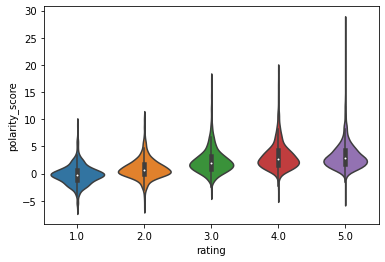

In [4]:
import seaborn as sns
sns.violinplot(y='polarity_score', x='rating', data=yelp_df)
yelp_df.describe()

#### interpret the result: 
* from the violinplot, we can see that individuals who gave lower scores also used a lot of negative words to descripe it. For examole,  most values of polarity of people who rated 1.0 are around 0, which means they used negative or netral words to describ their experience and food they had. 
* As rating goes higher, the general values of polarity of people also go higher.
* Another interesting thing is the range of values of polarity scores. For individuals who gave lower rating, the range of values of polarity is from around -5 to 10. But for individuals who gave higher rating, the range of values of polarity is from around -5 to 30. Maybe we can specualte that the high values of polarity made these indivaduals good, leading to high ratings.

### Task 2. For each review included in the dataset, extract the subjective phrases in the text using  `spacytextblob` and its `sentiment_assessments.assessments` feature. Then, for each review whose review_id is in the following `target_review_ids` list, find the top 3 reviews that are most similar to it in terms of their subjective phrases. 
### Answer the following questions:

* For each of the target reviews, what are the top 3 reviews that are most similar to it in terms of their subjective phrases?
* What is the rating of each of the target reviews? What about the rating of their top 3 most similar reviews? Are they correlated? Interpret the results. 

### Requirement:

* Use either spacy's word vector or the one-hot encoding method to get document-level word embeddings for the review text, which should be based only on the subjective phrases. 
* Use these word embeddings and the cosine similarity metric to find similar texts. 

In [5]:
target_review_ids = ["40thYphUgIfvJq17QCfTwA", "E9AB7V4z8xrt2uPF7T55FQ", "4PHFo_GRG4FEk1q4X7xQVQ", "4KpIldEM-tdnrJLqYzRfZQ", "PDHRlnEdkEcwATry4w71PQ", "meGaFP7yxQdjyABrYDVeoQ", "pgESDcC7eDx4z_epqon4_Q", "qeSxL-POvGLZD6aQ5O9kvw"]

In [6]:
review_df = pd.DataFrame(columns=['review_id', 'review_words','rating', 'polarity_score', 'subjective_score'])
review_df['rating'] = ratings
review_df['review_words'] = review_words
review_df['review_id'] = review_ids
review_df['polarity_score'] = polarity_scores
review_df['subjective_score'] = subjective_scores
review_df.head()

,review_id,review_words,rating,polarity_score,subjective_score
0,KU_O5udG6zpxOg-VcAEodg,"If you decide to eat here, just be aware it is...",3.0,1.023333,5.148333
1,BiTunyQ73aT9WBnpR9DZGw,I've taken a lot of spin classes over the year...,5.0,4.425000,6.283333
2,saUsX_uimxRlCVr67Z4Jig,Family diner. Had the buffet. Eclectic assortm...,3.0,1.539286,5.745238
3,AqPFMleE6RsU23_auESxiA,"Wow! Yummy, different, delicious. Our favo...",5.0,2.420455,5.704545
4,Sx8TMOWLNuJBWer-0pcmoA,Cute interior and owner (?) gave us tour of up...,4.0,5.613571,6.872857


In [7]:
target_df=review_df.loc[review_df['review_id'].isin(target_review_ids)]
print(target_df)

                  review_id  \
32   40thYphUgIfvJq17QCfTwA   
39   E9AB7V4z8xrt2uPF7T55FQ   
66   4KpIldEM-tdnrJLqYzRfZQ   
73   PDHRlnEdkEcwATry4w71PQ   
84   meGaFP7yxQdjyABrYDVeoQ   
96   4PHFo_GRG4FEk1q4X7xQVQ   
347  qeSxL-POvGLZD6aQ5O9kvw   
424  pgESDcC7eDx4z_epqon4_Q   

                                          review_words  rating  \
32   Great staff always helps and always nice. Alwa...     5.0   
39   Amazing biscuits and (fill in the blank). Grea...     5.0   
66   I've only had the cannolis here but they are a...     5.0   
73   If I could give it a zero, I would. I order a ...     1.0   
84   Skip this train wreck if you are looking for d...     1.0   
96   A GREAT EXPERIENCE!!!!!!!!!  I was a completel...     5.0   
347  --------DINNER REVIEW----------\n\nI rarely wr...     1.0   
424  Came for all-you-can-eat, and ended up waiting...     1.0   

     polarity_score  subjective_score  
32         2.166667          3.350000  
39         1.660000          2.490000  
66   

In [21]:
vocab_with_freq = dict()

for i in tqdm(range(len(review_df))):
    review_text = review_df.loc[i, 'review_words']
    for token in nlp(review_text):
        if token.is_alpha:
            vocab_with_freq[token.lemma_.lower()] = vocab_with_freq.get(token.lemma_.lower(), 0) + 1

vocabulary_list = list(vocab_with_freq.keys())

100%|█████████████████████████████████████| 10000/10000 [03:53<00:00, 42.84it/s]


In [23]:
from scipy.spatial.distance import cosine
target_32 = review_df.loc[32, 'review_words']
token_indices = []

for token in nlp(target_32):
    #if token.is_alpha:
        #print(token.lemma_.lower())
        if token.lemma_.lower() in vocabulary_list:
            token_index_in_vocab = vocabulary_list.index(token.lemma_.lower())
            token_indices.append(token_index_in_vocab)
        #else:
            #print('token not recognized')

one_hot_encoding = np.zeros(len(cleaned_subjectives))
for token_index in token_indices:
    one_hot_encoding[token_index] = 1
print(one_hot_encoding)

[0. 1. 0. ... 0. 0. 0.]


In [24]:
one_hot_encodings = []

for i in tqdm(range(len(review_df))):
    review_text = review_df.loc[i, 'review_words'] 
    review_doc=nlp(review_text)
    token_indices = []

    for token in nlp(review_text):
        if token.is_alpha and token.lemma_.lower() in vocabulary_list:
            token_index_in_vocab = vocabulary_list.index(token.lemma_.lower())
            token_indices.append(token_index_in_vocab)


    one_hot_encoding = np.zeros(len(vocabulary_list))
    for token_index in token_indices:
        one_hot_encoding[token_index] = 1

    one_hot_encodings.append(one_hot_encoding)

100%|█████████████████████████████████████| 10000/10000 [08:16<00:00, 20.15it/s]


In [54]:
np.array(one_hot_encodings).shape

(10000, 6410)

In [29]:
print(target_df)

                  review_id  \
32   40thYphUgIfvJq17QCfTwA   
39   E9AB7V4z8xrt2uPF7T55FQ   
66   4KpIldEM-tdnrJLqYzRfZQ   
73   PDHRlnEdkEcwATry4w71PQ   
84   meGaFP7yxQdjyABrYDVeoQ   
96   4PHFo_GRG4FEk1q4X7xQVQ   
347  qeSxL-POvGLZD6aQ5O9kvw   
424  pgESDcC7eDx4z_epqon4_Q   

                                          review_words  rating  \
32   Great staff always helps and always nice. Alwa...     5.0   
39   Amazing biscuits and (fill in the blank). Grea...     5.0   
66   I've only had the cannolis here but they are a...     5.0   
73   If I could give it a zero, I would. I order a ...     1.0   
84   Skip this train wreck if you are looking for d...     1.0   
96   A GREAT EXPERIENCE!!!!!!!!!  I was a completel...     5.0   
347  --------DINNER REVIEW----------\n\nI rarely wr...     1.0   
424  Came for all-you-can-eat, and ended up waiting...     1.0   

     polarity_score  subjective_score  
32         2.166667          3.350000  
39         1.660000          2.490000  
66   

In [31]:
from scipy.spatial.distance import cosine
target_32 = review_df.loc[32, 'review_words']
similarity_values = []
for i in tqdm(range(1,len(review_df))):
    similarity_value = 1 - cosine(one_hot_encodings[32], one_hot_encodings[i])
    similarity_values.append(similarity_value)
    
no32_df= review_df.drop([32])                 
similar_df = pd.DataFrame(columns=['review_words', 'similarity_value_with_one_hot','rating'])
similar_df['review_words'] = no32_df.loc[:,'review_words']
similar_df['similarity_value_with_one_hot'] = similarity_values
similar_df['rating']=no32_df.loc[:,'rating']



similar_df.nlargest(4, ['similarity_value_with_one_hot'])

100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 6970.83it/s]


,review_words,similarity_value_with_one_hot,rating
31,"Great burgers,fries and salad! Burgers have a...",1.000000,5.0
7728,Great hotel. Clean. Friendly staff. Great brea...,0.348155,5.0
180,The food here is great. They're quick and the ...,0.333712,5.0
3197,This place is amazing ! Will make you feel spe...,0.319801,5.0


In [32]:
from scipy.spatial.distance import cosine
target_39 = review_df.loc[39, 'review_words']
similarity_values = []
for i in tqdm(range(1, len(review_df))):
    similarity_value = 1 - cosine(one_hot_encodings[39], one_hot_encodings[i])
    similarity_values.append(similarity_value)
    
no39_df= review_df.drop([39])                 
similar_df = pd.DataFrame(columns=['review_words', 'similarity_value_with_one_hot','rating'])
similar_df['review_words'] = no39_df.loc[:,'review_words']
similar_df['similarity_value_with_one_hot'] = similarity_values
similar_df['rating']=no39_df.loc[:,'rating']

similar_df.nlargest(4, ['similarity_value_with_one_hot'])

100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 6839.74it/s]


,review_words,similarity_value_with_one_hot,rating
38,My boyfriend and I tried this deli for the fir...,1.000000,5.0
2353,Amazing food. Was quick service too. Had the p...,0.350000,5.0
4096,"I ate here twice in three days, it was that go...",0.348155,5.0
1762,Great food!\nAmazing customer service!\nA hidd...,0.346688,5.0


In [33]:
target_66 = review_df.loc[66, 'review_words']
similarity_values = []
for i in tqdm(range(1, len(review_df))):
    similarity_value = 1 - cosine(one_hot_encodings[66], one_hot_encodings[i])
    similarity_values.append(similarity_value)
    
no66_df= review_df.drop([66])                 
similar_df = pd.DataFrame(columns=['review_words', 'similarity_value_with_one_hot','rating'])
similar_df['review_words'] = no66_df.loc[:,'review_words']
similar_df['similarity_value_with_one_hot'] = similarity_values
similar_df['rating']=no66_df.loc[:,'rating']

similar_df.nlargest(4, ['similarity_value_with_one_hot'])

100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 6439.54it/s]


,review_words,similarity_value_with_one_hot,rating
65,I stopped here because it was by the hotel I w...,1.000000,5.0
2608,The BBQ shrimp is amazing. Be prepared to get...,0.394771,5.0
4986,"Awesome little ""mom & pop"" cafe!!! Warm atmosp...",0.391972,5.0
6005,I've ordered twice from here and each time the...,0.388103,1.0


In [34]:
target_96 = review_df.loc[96, 'review_words']
similarity_values = []
for i in tqdm(range(1, len(review_df))):
    similarity_value = 1 - cosine(one_hot_encodings[96], one_hot_encodings[i])
    similarity_values.append(similarity_value)
    
no96_df= review_df.drop([96])                 
similar_df = pd.DataFrame(columns=['review_words', 'similarity_value_with_one_hot','rating'])
similar_df['review_words'] = no96_df.loc[:,'review_words']
similar_df['similarity_value_with_one_hot'] = similarity_values
similar_df['rating']=no96_df.loc[:,'rating']

similar_df.nlargest(4, ['similarity_value_with_one_hot'])

100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 6246.32it/s]


,review_words,similarity_value_with_one_hot,rating
95,Had to wait until my third trip to NOLA to act...,1.000000,5.0
1552,Wish I would have came on Yelp and read the pr...,0.382832,1.0
3339,This was our first experience eating lunch at ...,0.359037,5.0
7720,This place was perfect for kids of all ages. T...,0.358020,4.0


In [35]:
target_73 = review_df.loc[73, 'review_words']
similarity_values = []
for i in tqdm(range(1, len(review_df))):
    similarity_value = 1 - cosine(one_hot_encodings[73], one_hot_encodings[i])
    similarity_values.append(similarity_value)
    
no73_df= review_df.drop([73])                 
similar_df = pd.DataFrame(columns=['review_words', 'similarity_value_with_one_hot','rating'])
similar_df['review_words'] = no73_df.loc[:,'review_words']
similar_df['similarity_value_with_one_hot'] = similarity_values
similar_df['rating']=no73_df.loc[:,'rating']

similar_df.nlargest(4, ['similarity_value_with_one_hot'])

100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 6858.83it/s]


,review_words,similarity_value_with_one_hot,rating
72,After living in the STL area for way over 10 y...,1.000000,5.0
9659,This place has the worst customer service. My ...,0.424365,1.0
9865,Terrible service. Went at 1pm on a Saturday an...,0.410132,1.0
805,I dropped my car off first thing in the mornin...,0.407881,1.0


In [36]:
target_84 = review_df.loc[84, 'review_words']
similarity_values = []
for i in tqdm(range(1, len(review_df))):
    similarity_value = 1 - cosine(one_hot_encodings[84], one_hot_encodings[i])
    similarity_values.append(similarity_value)
    
no84_df= review_df.drop([84])                 
similar_df = pd.DataFrame(columns=['review_words', 'similarity_value_with_one_hot','rating'])
similar_df['review_words'] = no84_df.loc[:,'review_words']
similar_df['similarity_value_with_one_hot'] = similarity_values
similar_df['rating']=no84_df.loc[:,'rating']

similar_df.nlargest(4, ['similarity_value_with_one_hot'])


100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 6760.21it/s]


,review_words,similarity_value_with_one_hot,rating
83,I visited this restaurant 4 times during my 5 ...,1.000000,3.0
6461,We've been looking for a good Italian restaura...,0.395387,5.0
1905,Of all the restaurants we tried in New Orleans...,0.384260,5.0
2738,Our group very much enjoyed our meal. Our whol...,0.377051,4.0


In [37]:
target_347 = review_df.loc[347, 'review_words']
similarity_values = []
for i in tqdm(range(1, len(review_df))):
    similarity_value = 1 - cosine(one_hot_encodings[347], one_hot_encodings[i])
    similarity_values.append(similarity_value)
    
no347_df= review_df.drop([347])                 
similar_df = pd.DataFrame(columns=['review_words', 'similarity_value_with_one_hot','rating'])
similar_df['review_words'] = no347_df.loc[:,'review_words']
similar_df['similarity_value_with_one_hot'] = similarity_values
similar_df['rating']=no347_df.loc[:,'rating']

similar_df.nlargest(4, ['similarity_value_with_one_hot'])

100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 5789.43it/s]


,review_words,similarity_value_with_one_hot,rating
346,This place is a hidden gem. It is located in ...,1.000000,5.0
665,Really disappointed. I've been to the Marathon...,0.438611,1.0
4136,"This was my second visit here, and it was much...",0.437012,1.0
3276,If I could give zero stars I would. I never ev...,0.427633,1.0


In [38]:
target_424 = review_df.loc[424, 'review_words']
similarity_values = []
for i in tqdm(range(1, len(review_df))):
    similarity_value = 1 - cosine(one_hot_encodings[424], one_hot_encodings[i])
    similarity_values.append(similarity_value)
    
no424_df= review_df.drop([424])                 
similar_df = pd.DataFrame(columns=['review_words', 'similarity_value_with_one_hot','rating'])
similar_df['review_words'] = no424_df.loc[:,'review_words']
similar_df['similarity_value_with_one_hot'] = similarity_values
similar_df['rating']=no424_df.loc[:,'rating']

similar_df.nlargest(4, ['similarity_value_with_one_hot'])

100%|█████████████████████████████████████| 9999/9999 [00:01<00:00, 6753.44it/s]


,review_words,similarity_value_with_one_hot,rating
423,I actually eat here at least once a month . Th...,1.000000,3.0
138,Yes! I love this place! Maple Street Patisseri...,0.403101,5.0
3742,Went here a couple weeks ago with a group of 6...,0.399035,2.0
1329,"Eh, crust was dry and we got the Delmar which ...",0.396091,2.0


#### What is the rating of each of the target reviews? What about the rating of their top 3 most similar reviews? Are they correlated? Interpret the results.
* frome the result, we can see, reviews with similar words don't mean they have similar rating. for example, the last target review, the top 3 similar reviews have different ratings, ranging from 2.0 to 5.0. Rating and similar reviews are not correclated. But there is a trend that if they use similar reviews, ususally the ratings are similar. It makes sense, since every person has subjective standards.Maybe they think the food is good, but comparing with food in other shops, the food in here will be rated not so high since food in other shops is much better.